In [1]:
import pandas as pd
import numpy as np

In [2]:
f=pd.read_csv('flights.csv',low_memory= False)

In [3]:
f.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [5]:
fn= f[:100000]

In [6]:
fn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 100000 non-null  int64  
 1   MONTH                100000 non-null  int64  
 2   DAY                  100000 non-null  int64  
 3   DAY_OF_WEEK          100000 non-null  int64  
 4   AIRLINE              100000 non-null  object 
 5   FLIGHT_NUMBER        100000 non-null  int64  
 6   TAIL_NUMBER          99833 non-null   object 
 7   ORIGIN_AIRPORT       100000 non-null  object 
 8   DESTINATION_AIRPORT  100000 non-null  object 
 9   SCHEDULED_DEPARTURE  100000 non-null  int64  
 10  DEPARTURE_TIME       97702 non-null   float64
 11  DEPARTURE_DELAY      97702 non-null   float64
 12  TAXI_OUT             97629 non-null   float64
 13  WHEELS_OFF           97629 non-null   float64
 14  SCHEDULED_TIME       100000 non-null  float64
 15  ELAPSED_TIME      

In [7]:
fn['DIVERTED'].value_counts()

0    99776
1      224
Name: DIVERTED, dtype: int64

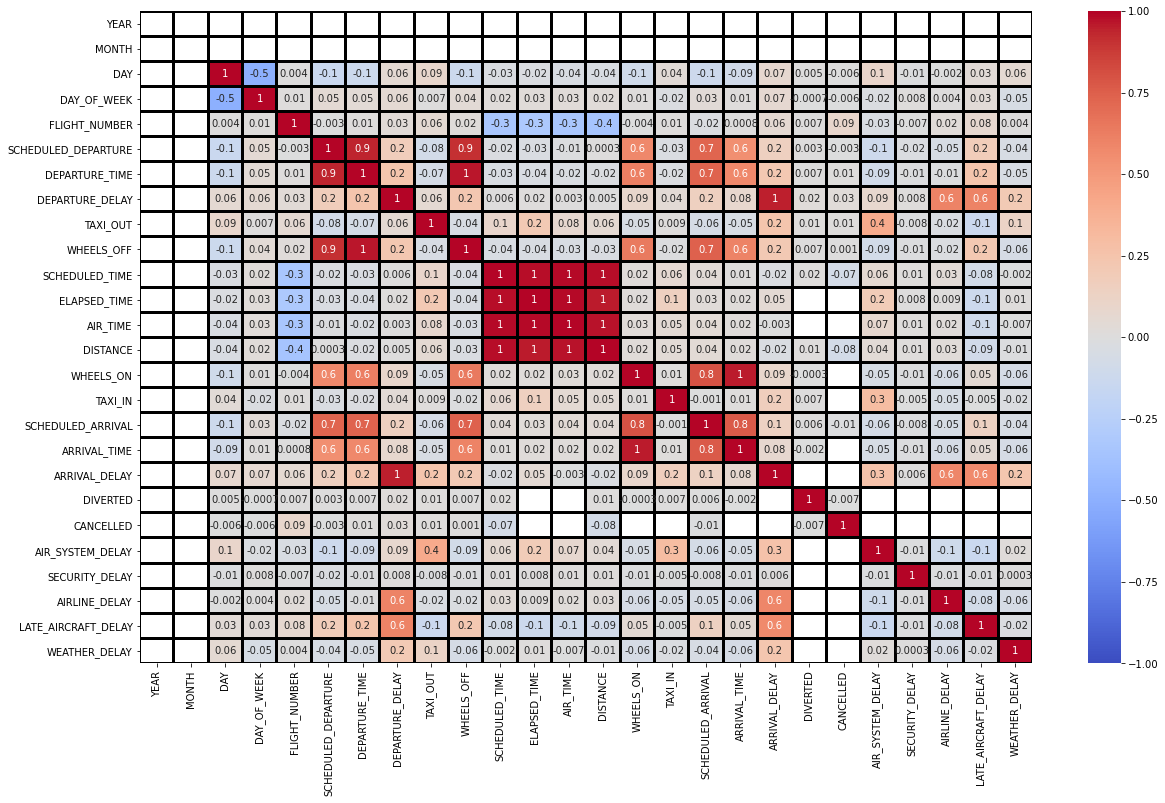

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize= (20, 12))
sns.heatmap(fn.corr(),annot = True,fmt='.1g',vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',linewidths=2, linecolor='black')
plt.show()

In [9]:
fnn=fn.drop(['YEAR','AIRLINE','FLIGHT_NUMBER','TAIL_NUMBER','TAXI_OUT','WHEELS_OFF','WHEELS_ON','SCHEDULED_TIME','DEPARTURE_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE','TAXI_IN', 'ARRIVAL_TIME','DAY_OF_WEEK','CANCELLATION_REASON'], axis = 1)

In [10]:
fnn.columns

Index(['MONTH', 'DAY', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY', 'SCHEDULED_ARRIVAL',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY'],
      dtype='object')

In [11]:
fnn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   MONTH                100000 non-null  int64  
 1   DAY                  100000 non-null  int64  
 2   ORIGIN_AIRPORT       100000 non-null  object 
 3   DESTINATION_AIRPORT  100000 non-null  object 
 4   SCHEDULED_DEPARTURE  100000 non-null  int64  
 5   DEPARTURE_DELAY      97702 non-null   float64
 6   SCHEDULED_ARRIVAL    100000 non-null  int64  
 7   ARRIVAL_DELAY        97387 non-null   float64
 8   DIVERTED             100000 non-null  int64  
 9   CANCELLED            100000 non-null  int64  
 10  AIR_SYSTEM_DELAY     34625 non-null   float64
 11  SECURITY_DELAY       34625 non-null   float64
 12  AIRLINE_DELAY        34625 non-null   float64
 13  LATE_AIRCRAFT_DELAY  34625 non-null   float64
 14  WEATHER_DELAY        34625 non-null   float64
dtypes: float64(7), int

In [12]:
fnn.fillna(fnn.mean(),inplace= True)

In [13]:
fnn['result']=np.where(fnn['ARRIVAL_DELAY']>15, 1, 0)

In [22]:
fnn.head(3)

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,result
0,1,1,ANC,SEA,5,-11.0,430,-22.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
1,1,1,LAX,PBI,10,-8.0,750,-9.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
2,1,1,SFO,CLT,20,-2.0,806,5.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0


In [43]:
fnn['result'].value_counts()

0    63779
1    36221
Name: result, dtype: int64

In [52]:
fnn.columns

Index(['MONTH', 'DAY', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY', 'SCHEDULED_ARRIVAL',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'result'],
      dtype='object')

In [54]:
from sklearn.model_selection import train_test_split
x= fnn[['MONTH', 'DAY', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY', 'SCHEDULED_ARRIVAL', 'DIVERTED','CANCELLED', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']]
y=fnn['result']
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, test_size = 0.3, random_state = 42)

In [55]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train= sc.fit_transform(x_train)

In [60]:
from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [61]:
from sklearn.metrics import roc_auc_score
pre = clf.predict(x_test)
print (roc_auc_score(yh,y_test))

0.8192873586227605
